In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
df1=pd.read_csv('The_Cancer_data_1500_V2.csv')


In [3]:
df1

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1
...,...,...,...,...,...,...,...,...,...
1495,62,1,25.090025,0,0,9.892167,1.284158,0,1
1496,31,0,33.447125,0,1,1.668297,2.280636,1,1
1497,63,1,32.613861,1,1,0.466848,0.150101,0,1
1498,55,0,25.568216,0,0,7.795317,1.986138,1,1


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


In [5]:
df1.describe()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000


In [6]:
df1.isnull().sum()

Age                 0
Gender              0
BMI                 0
Smoking             0
GeneticRisk         0
PhysicalActivity    0
AlcoholIntake       0
CancerHistory       0
Diagnosis           0
dtype: int64

In [7]:
df1.duplicated().sum()

0

In [8]:
teenegers = df1[(df1['Age'] > 0) & (df1['Age'] < 41)]
teenegers

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
5,27,0,37.105162,0,1,3.941905,2.324274,0,0
7,40,0,20.301121,1,0,4.929827,2.247995,1,0
10,38,1,35.996533,0,2,8.467850,2.642921,0,1
12,30,1,23.835534,0,1,4.035200,3.677604,1,1
...,...,...,...,...,...,...,...,...,...
1479,27,1,31.043360,1,0,5.476161,0.572664,0,1
1485,31,0,17.534322,0,0,5.001979,4.166372,0,0
1487,32,0,21.907978,0,0,7.012933,3.597792,0,1
1489,37,0,39.509219,0,1,3.509756,4.230596,0,0


In [9]:
men = df1[(df1['Age'] > 39) & (df1['Age'] < 61)]
men

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
7,40,0,20.301121,1,0,4.929827,2.247995,1,0
8,58,1,30.274525,0,1,4.719025,0.943161,1,1
11,42,0,37.500578,1,2,8.319415,4.053019,0,1
...,...,...,...,...,...,...,...,...,...
1488,59,1,25.800473,0,1,7.890406,0.537266,0,0
1490,44,1,16.687564,0,0,4.046537,3.678590,0,1
1491,52,1,27.967525,0,1,3.936819,1.058584,0,1
1493,59,1,39.266914,0,0,0.612167,1.581462,0,1


In [10]:
elderly = df1[(df1['Age'] > 59) & (df1['Age'] < 100)]
elderly

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1
6,80,1,20.701994,0,0,8.482031,3.152943,0,0
9,77,0,25.275712,0,1,4.903125,2.539487,0,0
15,72,1,21.870151,0,0,5.727725,3.603081,0,0
...,...,...,...,...,...,...,...,...,...
1492,66,1,19.484117,0,0,1.918732,0.726430,0,1
1494,79,1,17.832588,0,0,5.909161,4.880353,0,1
1495,62,1,25.090025,0,0,9.892167,1.284158,0,1
1497,63,1,32.613861,1,1,0.466848,0.150101,0,1


In [11]:
df1['teenagers'] = teenegers['Age']
df1['men'] = men['Age']
df1['elderly'] = elderly['Age']
df1.to_csv('cancer_with_teenagers.csv', index=False)
df1

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis,teenagers,men,elderly
0,58,1,16.085313,0,1,8.146251,4.148219,1,1,NaN,58.0,NaN
1,71,0,30.828784,0,1,9.361630,3.519683,0,0,NaN,NaN,71.0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1,NaN,48.0,NaN
3,34,0,30.040296,0,0,9.502792,2.044636,0,0,34.0,NaN,NaN
4,62,1,35.479721,0,0,5.356890,3.309849,0,1,NaN,NaN,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,62,1,25.090025,0,0,9.892167,1.284158,0,1,NaN,NaN,62.0
1496,31,0,33.447125,0,1,1.668297,2.280636,1,1,31.0,NaN,NaN
1497,63,1,32.613861,1,1,0.466848,0.150101,0,1,NaN,NaN,63.0
1498,55,0,25.568216,0,0,7.795317,1.986138,1,1,NaN,55.0,NaN


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
 9   teenagers         484 non-null    float64
 10  men               547 non-null    float64
 11  elderly           508 non-null    float64
dtypes: float64(6), int64(6)
memory usage: 140.8 KB


In [13]:
df1.describe()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis,teenagers,men,elderly
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,484.000000,547.000000,508.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333,29.500000,50.000000,70.456693
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322,6.064696,5.911124,5.911585
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000,20.000000,40.000000,60.000000
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000,24.000000,45.000000,66.000000
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000,29.000000,50.000000,70.000000
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000,35.000000,55.000000,76.000000
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000,40.000000,60.000000,80.000000


In [14]:
df1.isnull().sum()

Age                    0
Gender                 0
BMI                    0
Smoking                0
GeneticRisk            0
PhysicalActivity       0
AlcoholIntake          0
CancerHistory          0
Diagnosis              0
teenagers           1016
men                  953
elderly              992
dtype: int64

In [15]:
df1.duplicated().sum()

0

In [16]:
df1

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis,teenagers,men,elderly
0,58,1,16.085313,0,1,8.146251,4.148219,1,1,NaN,58.0,NaN
1,71,0,30.828784,0,1,9.361630,3.519683,0,0,NaN,NaN,71.0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1,NaN,48.0,NaN
3,34,0,30.040296,0,0,9.502792,2.044636,0,0,34.0,NaN,NaN
4,62,1,35.479721,0,0,5.356890,3.309849,0,1,NaN,NaN,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,62,1,25.090025,0,0,9.892167,1.284158,0,1,NaN,NaN,62.0
1496,31,0,33.447125,0,1,1.668297,2.280636,1,1,31.0,NaN,NaN
1497,63,1,32.613861,1,1,0.466848,0.150101,0,1,NaN,NaN,63.0
1498,55,0,25.568216,0,0,7.795317,1.986138,1,1,NaN,55.0,NaN


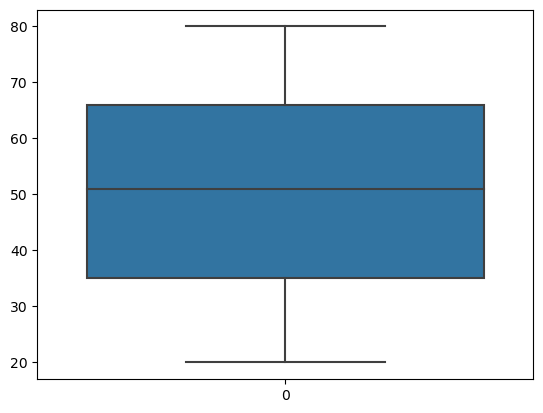

In [17]:
sns.boxplot(df1['Age'])
plt.show()

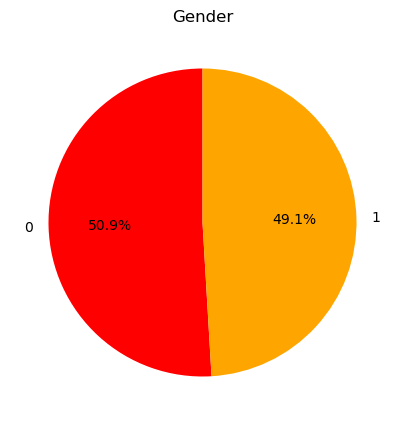

In [18]:
plt.figure(figsize=(5,5))
df1['Gender'].value_counts().plot.pie(autopct='%1.1f%%',startangle=90,colors=['red','orange'])
plt.title('Gender')
plt.ylabel('')
plt.show()

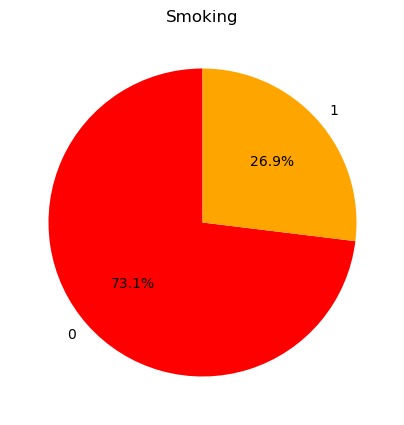

In [19]:
plt.figure(figsize=(5,5))
df1['Smoking'].value_counts().plot.pie(autopct='%1.1f%%',startangle=90,colors=['red','orange'])
plt.title('Smoking')
plt.ylabel('')
plt.show()

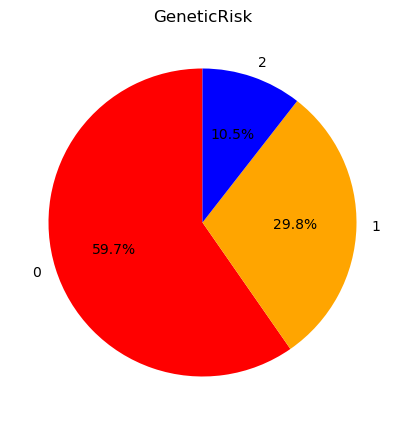

In [20]:
plt.figure(figsize=(5,5))
df1['GeneticRisk'].value_counts().plot.pie(autopct='%1.1f%%',startangle=90,colors=['red','orange','b'])
plt.title('GeneticRisk')
plt.ylabel('')
plt.show()

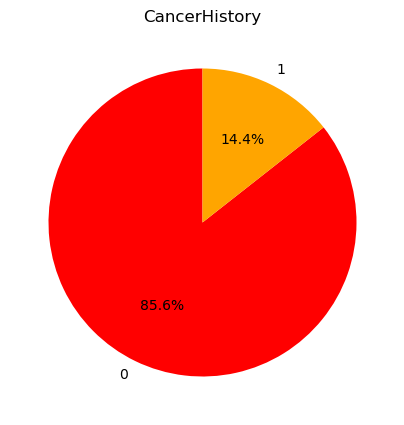

In [21]:
plt.figure(figsize=(5,5))
df1['CancerHistory'].value_counts().plot.pie(autopct='%1.1f%%',startangle=90,colors=['red','orange'])
plt.title('CancerHistory')
plt.ylabel('')
plt.show()

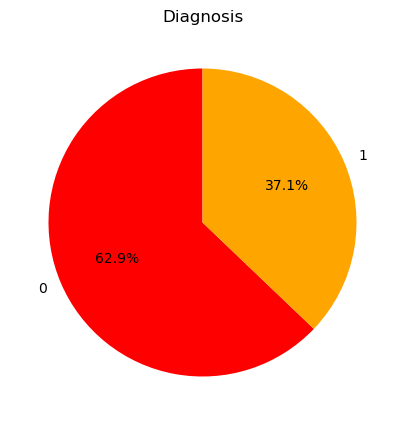

In [22]:
plt.figure(figsize=(5,5))
df1['Diagnosis'].value_counts().plot.pie(autopct='%1.1f%%',startangle=90,colors=['red','orange'])
plt.title('Diagnosis')
plt.ylabel('')
plt.show()

<Axes: xlabel='teenagers', ylabel='count'>

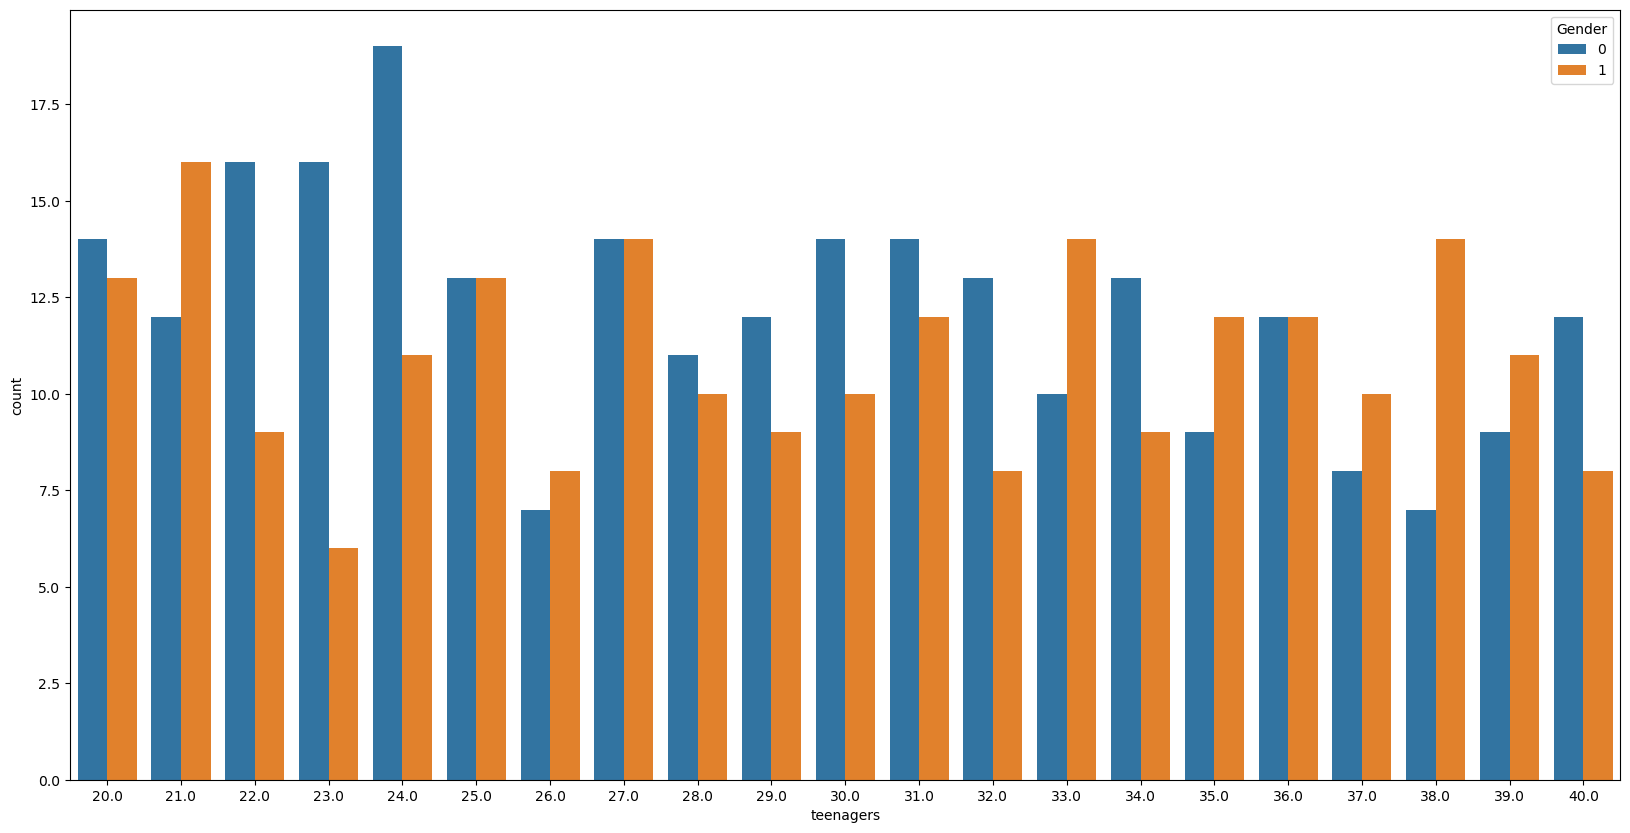

In [23]:
plt.figure(figsize=(20,10))
sns.countplot(x='teenagers',hue='Gender',data=df1)

<Axes: xlabel='men', ylabel='count'>

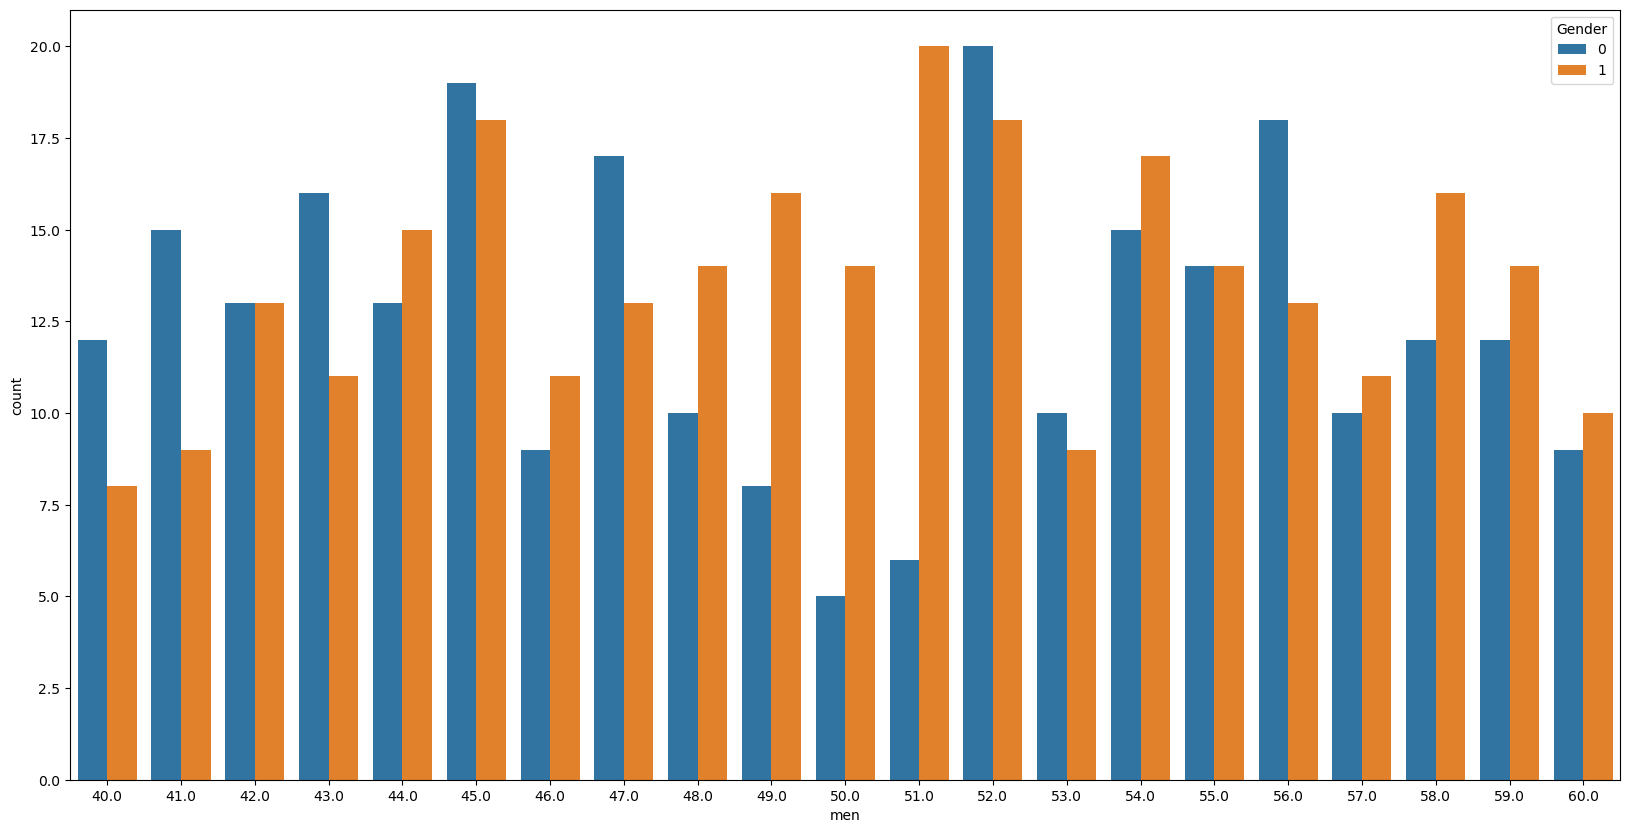

In [24]:
plt.figure(figsize=(20,10))
sns.countplot(x='men',hue='Gender',data=df1)

<Axes: xlabel='elderly', ylabel='count'>

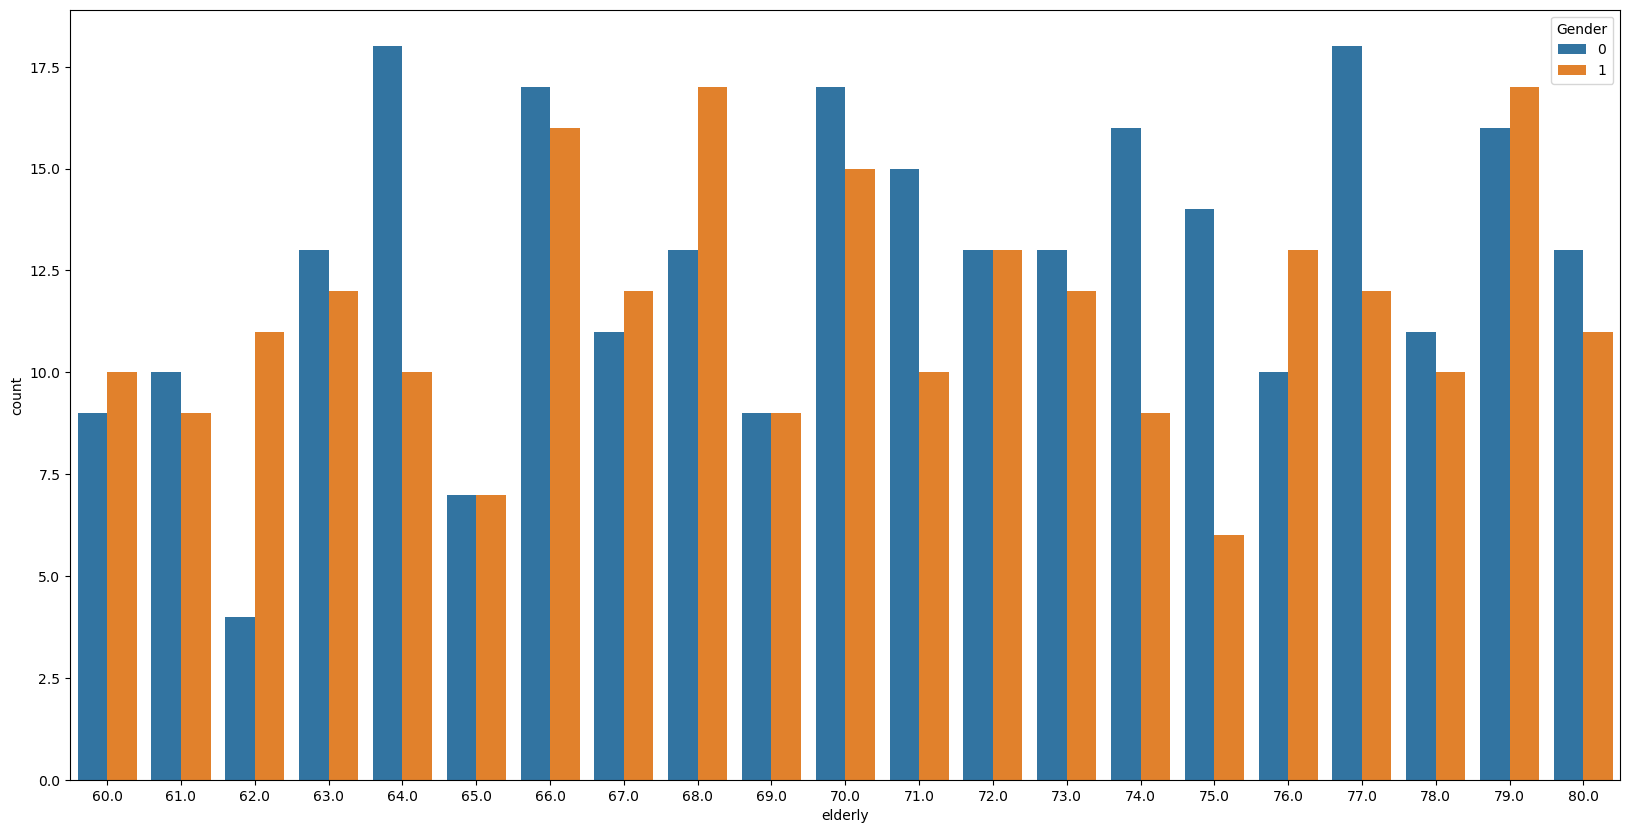

In [25]:
plt.figure(figsize=(20,10))
sns.countplot(x='elderly',hue='Gender',data=df1)

<Axes: xlabel='teenagers', ylabel='count'>

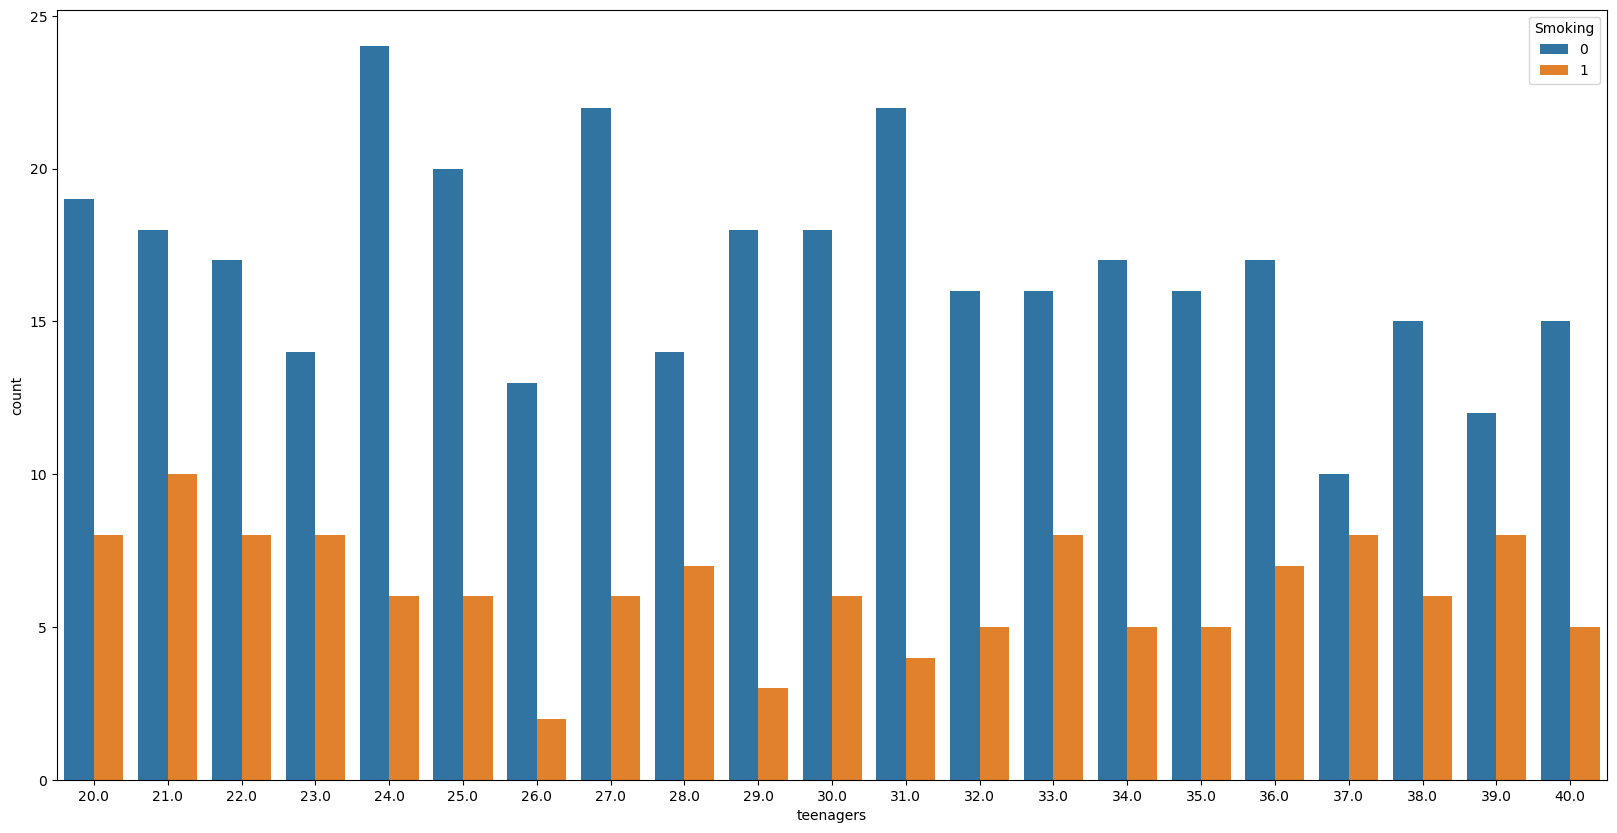

In [26]:
plt.figure(figsize=(20,10))
sns.countplot(x='teenagers',hue='Smoking',data=df1)

<Axes: xlabel='men', ylabel='count'>

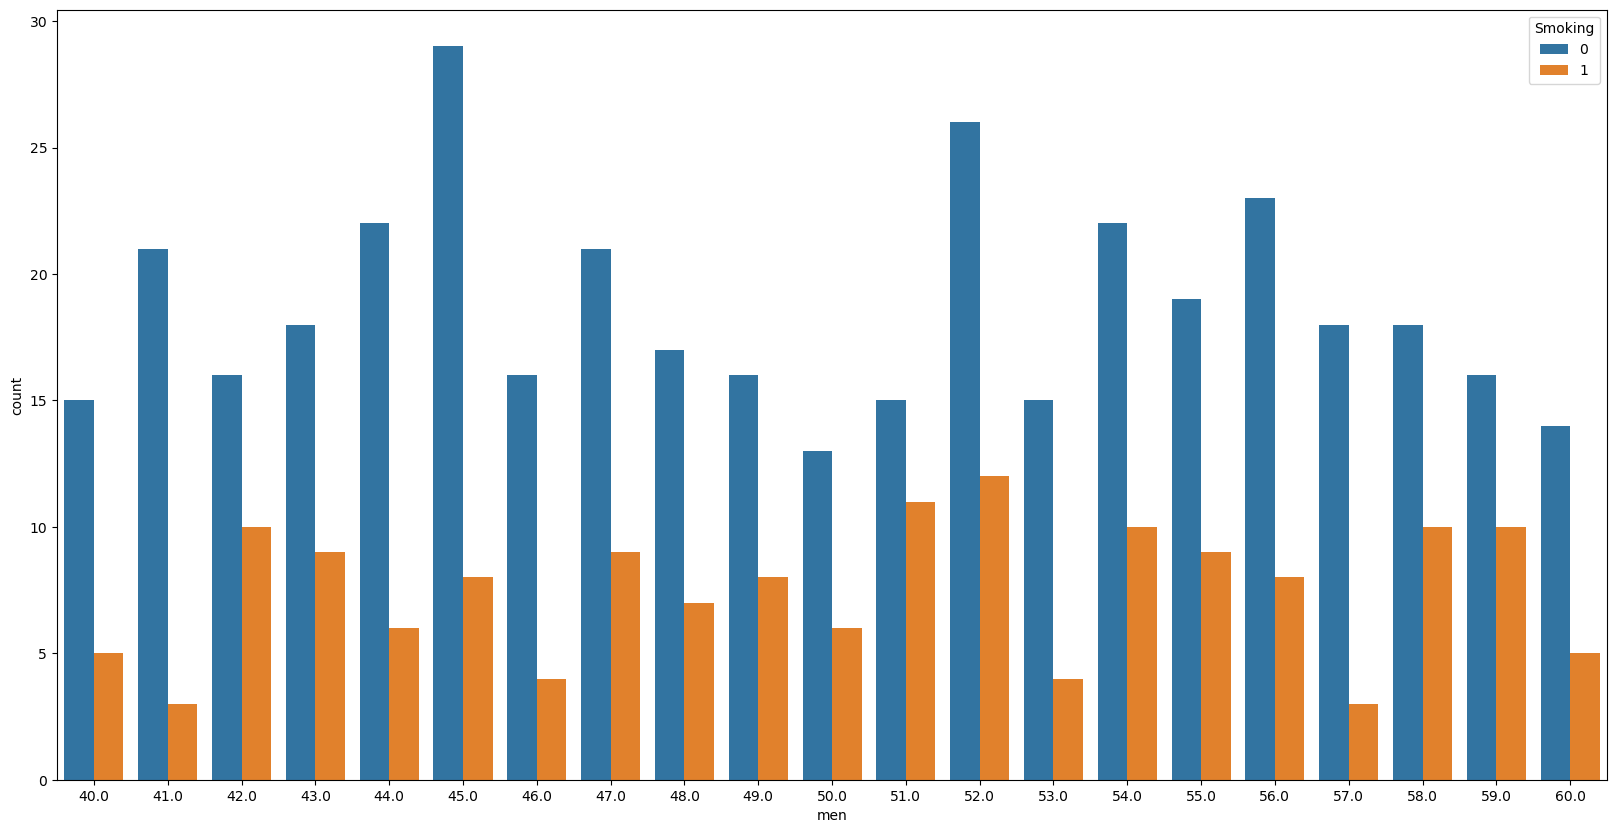

In [27]:
plt.figure(figsize=(20,10))
sns.countplot(x='men',hue='Smoking',data=df1)

<Axes: xlabel='elderly', ylabel='count'>

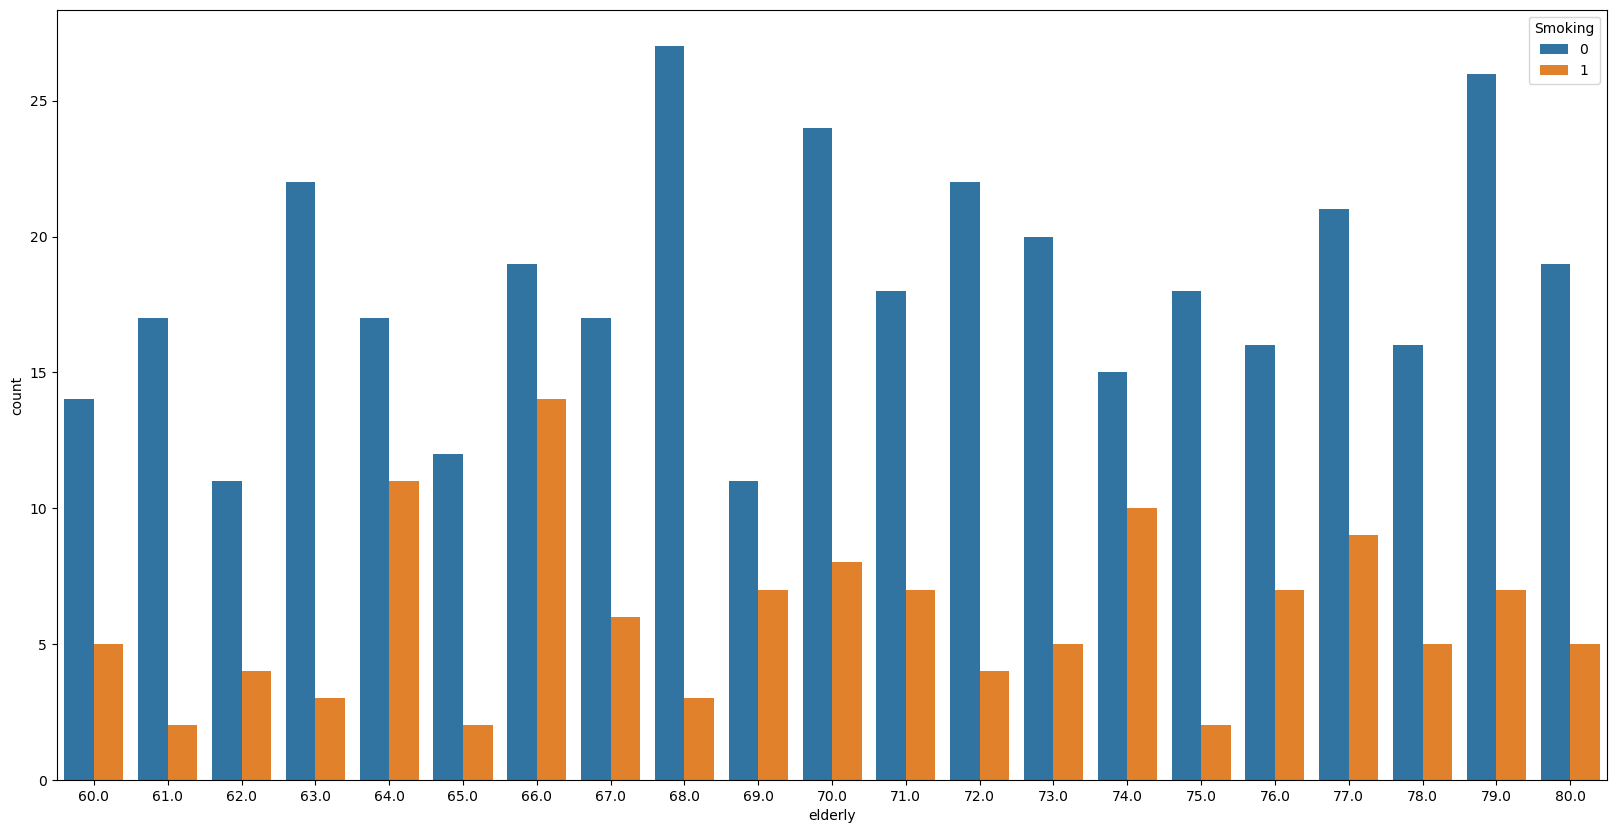

In [28]:
plt.figure(figsize=(20,10))
sns.countplot(x='elderly',hue='Smoking',data=df1)

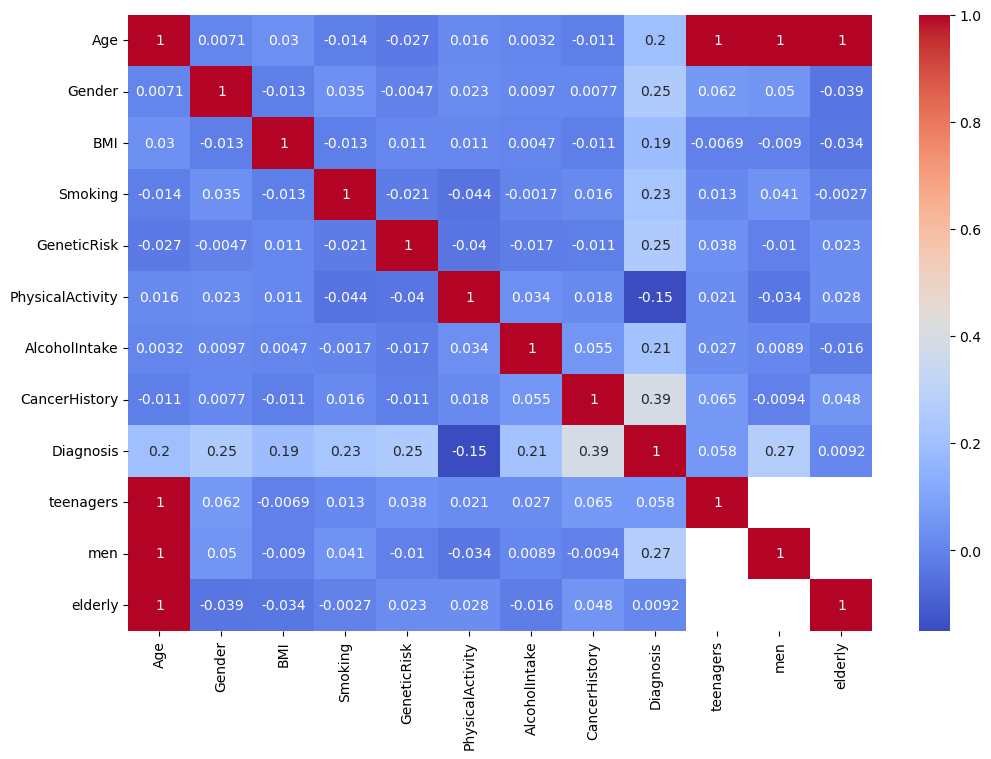

In [29]:
corr_matrix = df1.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.show()

In [30]:
X = df1.drop(columns=['Diagnosis'])
y = df1['Diagnosis']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
len(X_train)

In [13]:
len(X_test)

300

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [15]:
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn.score(X_test, y_test)

0.65

In [16]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, knn_pred))

0.65


In [17]:
from sklearn import svm

model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [18]:
y_pred = model.predict(X_test)

In [20]:

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.86


In [21]:

print("Precision:",metrics.precision_score(y_test, y_pred))


print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.8627450980392157
Recall: 0.7586206896551724


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
final_test_accuracy = accuracy_score(y_test, y_pred)
final_test_precision = precision_score(y_test, y_pred)
final_test_recall = recall_score(y_test, y_pred)
final_test_f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Final Test Accuracy: {final_test_accuracy}")
print(f"Final Test Precision: {final_test_precision}")
print(f"Final Test Recall: {final_test_recall}")
print(f"Final Test F1 Score: {final_test_f1}")

Final Test Accuracy: 0.86
Final Test Precision: 0.8627450980392157
Final Test Recall: 0.7586206896551724
Final Test F1 Score: 0.8073394495412844
